<a href="https://colab.research.google.com/github/Sabeerawa05/Datasets-Practices/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine learning Home Work
Sabeer Saeed
## The work was done using cifar10 images datasets of images. on Artificial Neural Network the data sets gives a poor accuracy result. But using Convolutional Neural Network it gives average of 0.69 level of accuracy due to multiple number of combination of vehicles and animals.

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
#Range these numbers to a limit of 0 to 1 then applying them to the artificial neural network model.
#To ascertain we divide the values by 255.
#It is significant that the training set and the testing set to be preprocessed in the same way:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 2s 0us/step


#to view the train Shape

In [ ]:
train_images.shape

(50000, 32, 32, 3)

#to view the test Shape

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

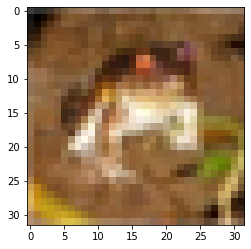

In [ ]:
plt.imshow(train_images[0])

In [ ]:
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
#to reshape it one dimentional for easy assessment
train_labels = train_labels.reshape(-1,)
train_labels[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
classes[9]

'truck'

In [ ]:
classes[6]

'frog'

In [ ]:
def plot_sample(train, test, index):
    plt.figure(figsize=(15,2))
    plt.imshow(train[index])
    plt.xlabel(classes[test[index]])

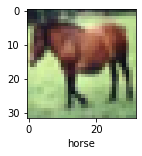

In [ ]:
plot_sample(train_images, train_labels, 7)

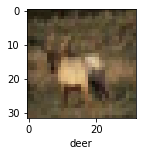

In [ ]:
plot_sample(train_images, train_labels, 3)

In [ ]:
#Now let build the Neural Network

artnet = models.Sequential([
            layers.Flatten(input_shape=(32,32,3)),
            layers.Dense(3000, activation='relu'),
            layers.Dense(1000, activation='relu'),
            layers.Dense(10, activation='sigmoid')
                ])

artnet.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

artnet.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 107s 69ms/step - loss: 1.8555 - accuracy: 0.3353
Epoch 2/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.6573 - accuracy: 0.4149
Epoch 3/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5685 - accuracy: 0.4476
Epoch 4/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5059 - accuracy: 0.4680
Epoch 5/5
1563/1563 [==============================] - 99s 64ms/step - loss: 1.4534 - accuracy: 0.4866


In [ ]:
#it did terebly

In [ ]:
test_loss, test_acc = artnet.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 7s - loss: 1.4812 - accuracy: 0.4791

Test accuracy: 0.47909998893737793


In [ ]:
#also overfitting

In [ ]:
artnet.evaluate(test_images, test_labels)

313/313 [==============================] - 7s 24ms/step - loss: 1.4812 - accuracy: 0.4791


[1.4812389612197876, 0.47909998893737793]

In [ ]:
#Now let build the Convolutional Neural Network

convnet = models.Sequential([
            layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),

            #Dense
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
                ])




In [ ]:
convnet.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
convnet.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.4374 - accuracy: 0.4855
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0898 - accuracy: 0.6176
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9603 - accuracy: 0.6634
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8692 - accuracy: 0.6985
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8016 - accuracy: 0.7214
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7357 - accuracy: 0.7434
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6791 - accuracy: 0.7645
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6286 - accuracy: 0.7824
Epoch 9/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.5825 - accuracy: 0.7965
Epoch 10/10
1563/1563 [==============================] - 58s 37m

In [ ]:
convnet.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 12ms/step - loss: 0.9754 - accuracy: 0.6941


[0.9753645658493042, 0.694100022315979]

## Because of the images in the datasets is randum so the make the classification a little bit difficult.

In [ ]:
# To make it for display purpose by normalizing the array
test_labels = test_labels.reshape(-1,)
test_labels[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

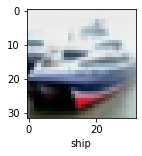

In [ ]:
#to Display an images
plot_sample(test_images, test_labels, 1)

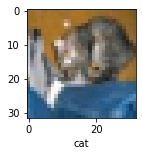

In [ ]:
plot_sample(test_images, test_labels, 0)

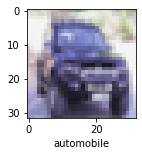

In [ ]:
#To display another image
plot_sample(test_images, test_labels, 9)

In [ ]:
#Now let predict
test_pred = convnet.predict(test_images)
test_pred[:5]

array([[1.37186944e-05, 1.42429735e-05, 1.27819565e-03, 9.15565431e-01,
        2.81919183e-05, 4.45969729e-03, 8.13791237e-04, 9.97246048e-07,
        7.77753145e-02, 5.05596217e-05],
       [2.02366756e-03, 1.75989065e-02, 3.27464136e-07, 6.96361576e-06,
        1.02804121e-09, 3.70404685e-09, 4.71737482e-10, 6.64458488e-11,
        9.78176832e-01, 2.19325395e-03],
       [1.92363430e-02, 6.32450432e-02, 1.23373131e-04, 3.50133545e-04,
        1.10996216e-05, 7.14950465e-06, 4.88651904e-06, 6.43502972e-06,
        9.16091919e-01, 9.23555985e-04],
       [6.96988642e-01, 5.44719442e-05, 6.60073943e-04, 4.99247864e-04,
        1.47841447e-05, 2.74195116e-07, 2.51467573e-05, 4.37582088e-07,
        3.00640553e-01, 1.11640221e-03],
       [1.55628967e-07, 6.31722942e-05, 3.14467475e-02, 1.43195251e-02,
        7.16416478e-01, 3.77943181e-03, 2.33442262e-01, 1.62764773e-05,
        4.00797289e-04, 1.15102972e-04]], dtype=float32)

In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
test_classes = [np.argmax(element) for element in test_pred]
test_classes[:5]


[3, 8, 8, 0, 4]

In [ ]:
test_labels[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes[test_classes[4]]

'deer'

## But in the real image it is frog because the image and it dataset is very complex. even you may think the picture may be

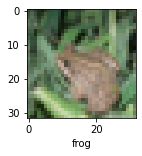

In [ ]:
plot_sample(test_images, test_labels, 4)